### Notebook for creating figures from the OFAT data

This notebook makes use from data created using the Python script OFAT.py. This data has been collected already and is saved in the ``/data/OFAT`` directory, and imported here. Run this notebook to obtain figures for various input variables and model output reporters.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# from model import LeafcutterAntsFungiMutualismModel, track_ants, track_leaves, track_ratio_foragers, track_ants_leaves, track_dormant_ants

import sys
import os

if not os.path.exists('figures/OFAT/report'):
    os.makedirs('figures/OFAT/report')
    
# plot settings
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["legend.fontsize"] = 12.5
mpl.rcParams["font.size"] = 13.5
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.3
mpl.rcParams["axes.axisbelow"] = True

USE_TEX = True

if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
    
plt.rc("font", family="serif")

#### The following cell contains functions for plotting

In [27]:
# dictionary for relabeling
param_names = {'num_ants': r'Initial number of ants $A(0)$',
            'num_plants': r'Number of plants $P(0)$', 
            'pheromone_lifespan': r'Pheromone lifespan $T_p$',
            'num_plant_leaves': r'Leaves per plant $P_L(O)$',
            'initial_foragers_ratio': r'Initial fraction of foragers $\pi_f(0)$', 
           'leaf_regrowth_rate': r'Leaf regrowth rate $L_\mathrm{growth}$',
            'ant_death_probability': r'Ant death probability $d_A$',
            'initial_fungus_energy': r'Initial fungus energy $F(0)$',
            'fungus_decay_rate': r'Fungus decay rate $d_F$', 
            'energy_biomass_cvn': r'Leaf-fungus conversion $c_F$', 
           'fungus_larvae_cvn': r'Fungus-larvae conversion $c_A$',
            'max_fitness_queue_size': r'Moran process memory $K$',
            'caretaker_carrying_amount': r'Caretaker carrying amount $F_C$',
            'dormant_roundtrip_mean': r'Dormancy duration mean $\mu_D$',
            'caretaker_roundtrip_mean': r'Round-trip duration mean $\mu_R$',
}

output_names = {"Ants_Biomass": r'Number of Ants $A(t)$',
                   "Fungus_Biomass": r'Fungus biomass $F(t)$',
                   "Fraction forager ants": r'Fraction forager ants $\pi_f(t)$',
                   "Dormant caretakers fraction": r'Fraction dormant $\pi_{c_D}(t)$',
                   "Death reason": r"Fraction of extinct runs",
               }

title_names = {"Ants_Biomass": r'Number of Ants $A(t)$',
                   "Fungus_Biomass": r'Fungus biomass $F(t)$',
                   "Fraction forager ants": r'Fraction forager ants $\pi_f(t)$',
                   "Dormant caretakers fraction": r'Fraction dormant $\pi_{c_D}(t)$',
                   "Death reason": r"Fraction of extinct runs",
               }


def plot_param_var_conf(ax, df, var, param, i):
    """
    Modified from the Sensitivity Analysis notebook provided by the course Agent-based-modelling
    
    Helper function for plot_all_vars. Plots the individual parameter vs
    variables passed.
    Args:
        ax: the axis to plot to
        df: dataframe that holds the data to be plotted
        var: variables to be taken from the dataframe
        param: which output variable to plot
    """
    x = df.groupby(var).mean().reset_index()[var]
    y = df.groupby(var).mean()[param]

    repetitions = df.groupby(var)[param].count()
    minimum = df.groupby(var)[param].min()
    maximum = df.groupby(var)[param].max()
    
    stdev = df.groupby(var)[param].std()
    
    # plot mean and standard deviation
    ax.vlines(x, y-stdev, y + stdev, color='grey', alpha = 0.8)
    ax.plot(df[var], df[param], 'ko', markersize=0.8)

    # plot each run seperately
    ax.scatter(x, y, c='darkgreen', marker='o')
    
    # plot minimum and maximum
    ax.scatter(x, minimum, c='magenta', marker='x')
    ax.scatter(x, maximum, c='deepskyblue', marker='+')

    ax.set_xlabel(param_names[var], fontsize=14)
    ax.set_ylabel(output_names[param], fontsize=14)
    # ax.grid()
    ax.tick_params(which='both', labelsize=12)
    
    

def plot_all_vars(data, model_reporters, problem, save_fig=False, show_fig=False, save_name=None, col_row=False):
    """
    Modified from the Sensitivity Analysis notebook provided by the course Agent-based-modelling

    Uses plot_param_var_conf to plot the OFAT results provided in data on separate axes
    """

    if not col_row:
        fig, axs = plt.subplots(len(problem.keys()),len(model_reporters), figsize=(5*(len(model_reporters)), 3.5*len(problem.keys())),
    #                             constrained_layout=True
                                )

        for row, var in enumerate(problem.keys()):
            for col, output_param in enumerate(model_reporters):
                # exclude Death reason as model reporter
                if output_param != 'Death reason':

                    if len(problem.keys()) == 1 and len(model_reporters) > 1:
                        plot_param_var_conf(axs[col], data[var], var, output_param, col)
                    elif len(problem.keys()) > 1 and len(model_reporters) == 1:
                        plot_param_var_conf(axs[row], data[var], var, output_param, col)
                    elif len(problem.keys()) == 1 and len(model_reporters) == 1:
                        plot_param_var_conf(axs, data[var], var, output_param, col)
                    else:
                        plot_param_var_conf(axs[row,col], data[var], var, output_param, col)
    
    if col_row:
        fig, axs = plt.subplots(len(model_reporters), len(problem.keys()),figsize=(5*len(problem.keys()), 3.5*(len(model_reporters))),
    #                             constrained_layout=True
                                )

        for row, var in enumerate(problem.keys()):
            for col, output_param in enumerate(model_reporters):
                # exclude Death reason as model reporter
                if output_param != 'Death reason':

                    if len(problem.keys()) == 1 and len(model_reporters) > 1:
                        plot_param_var_conf(axs[col], data[var], var, output_param, col)
                    elif len(problem.keys()) > 1 and len(model_reporters) == 1:
                        plot_param_var_conf(axs[row], data[var], var, output_param, col)
                    elif len(problem.keys()) == 1 and len(model_reporters) == 1:
                        plot_param_var_conf(axs, data[var], var, output_param, col)
                    else:
                        plot_param_var_conf(axs[col,row], data[var], var, output_param, col)

    fig.tight_layout()

    if save_fig:
        # fig.savefig('figures/OFAT/presentation' + fileName + '.svg')
        # fig.savefig('figures/OFAT/presentation' + fileName + '.pdf', bbox_inches='tight')
        fig.savefig(f'figures/OFAT/report/{save_name}.pdf', bbox_inches='tight')

    if show_fig:
        plt.show()
        
def plot_fraction_dead(data, model_reporters, save_fig=False, show_fig=False, save_name=None):
    """ Creates figure of the fraction of colonies that died out in early stage,
    for the variable parameters run for in the OFAT """

    # fig, axs = plt.subplots(1, len(data.keys()), figsize=(3.5*len(data.keys()), 5),
    #                         constrained_layout=True
                            # )
    fig, axs = plt.subplots(4,4, figsize=(4*5, 5*4),
                        constrained_layout=True
                        )
    counter = 0
    for row in range(4):
        for col in range(4):
            var = list(data.keys())[counter]

            param = 'Death reason'

            df = data[var]

            x = df.groupby(var).mean().reset_index()[var] 
            y = df.groupby(var).count()['Death reason'] / 64 # this is hard coded
            axs[row, col].plot(x, y, c='darkgreen', marker='o')
            axs[row, col].set_xlabel(param_names[var], fontsize=12)
            axs[row, col].set_ylabel('Fraction Dead', fontsize=12)
            axs[row, col].tick_params(which='both', labelsize=12)
            counter += 1
            axs[row, col].set_ylim(0,1)
            
    fig.suptitle('Fraction of 64 colonies that die out in early stage', fontsize=24)
    # fig.tight_layout()
    if save_fig:
        fig.savefig('figures/OFAT/report/fractiondeath' + save_name + '.pdf', bbox_inches='tight')

    if show_fig:
        plt.show()

In [28]:
def recover_OFAT_data(fileName):
    """
    Recovers data saved in collect_OFAT_data function
    """
    return dict(np.load('data/OFAT/' + fileName + '.npz', allow_pickle=True))

In [29]:
repetitions = 64
max_steps = 1000
distinct_samples = 10

fileName = f"reps{repetitions}maxtime{max_steps}distinctsam{distinct_samples}exp_a"

results = recover_OFAT_data(fileName)

data = results['data'][()]
# problem = results['problem'][()]
model_reporters = results['model_reporters'][()]
fixed_parameters = results['fixed_parameters'][()]


problem = {#'num_ants': [int, [10,100]],
        #    'num_plants': [int, [30,200]], 
        #    'pheromone_lifespan': [int, [5, 100]],
        #    'num_plant_leaves': [int, [10, 200]],
        #    'initial_foragers_ratio': [float, [0.1, 1.0]], 
           'leaf_regrowth_rate': [float, [0.01, 1.0]],
        #    'ant_death_probability': [float, [0, 0.02]],
        #    'initial_fungus_energy': [float, [10, 100]],
        #    'fungus_decay_rate': [float, [0.001, 0.02]], 
        #    'energy_biomass_cvn': [float, [1, 4]], 
           'fungus_larvae_cvn': [float, [0.2, 1.5]],
        #    'energy_per_offspring': [float, [0.5, 1.5]],
        #    'max_fitness_queue_size': [int, [1, 20]],
        #    'caretaker_carrying_amount': [float, [0.1, 2]],
        #    'dormant_roundtrip_mean': [float, [30, 80]],
        #    'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = ["Ants_Biomass",
                   "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
                   "Death reason",
]





### Initial Conditions OFAT figures

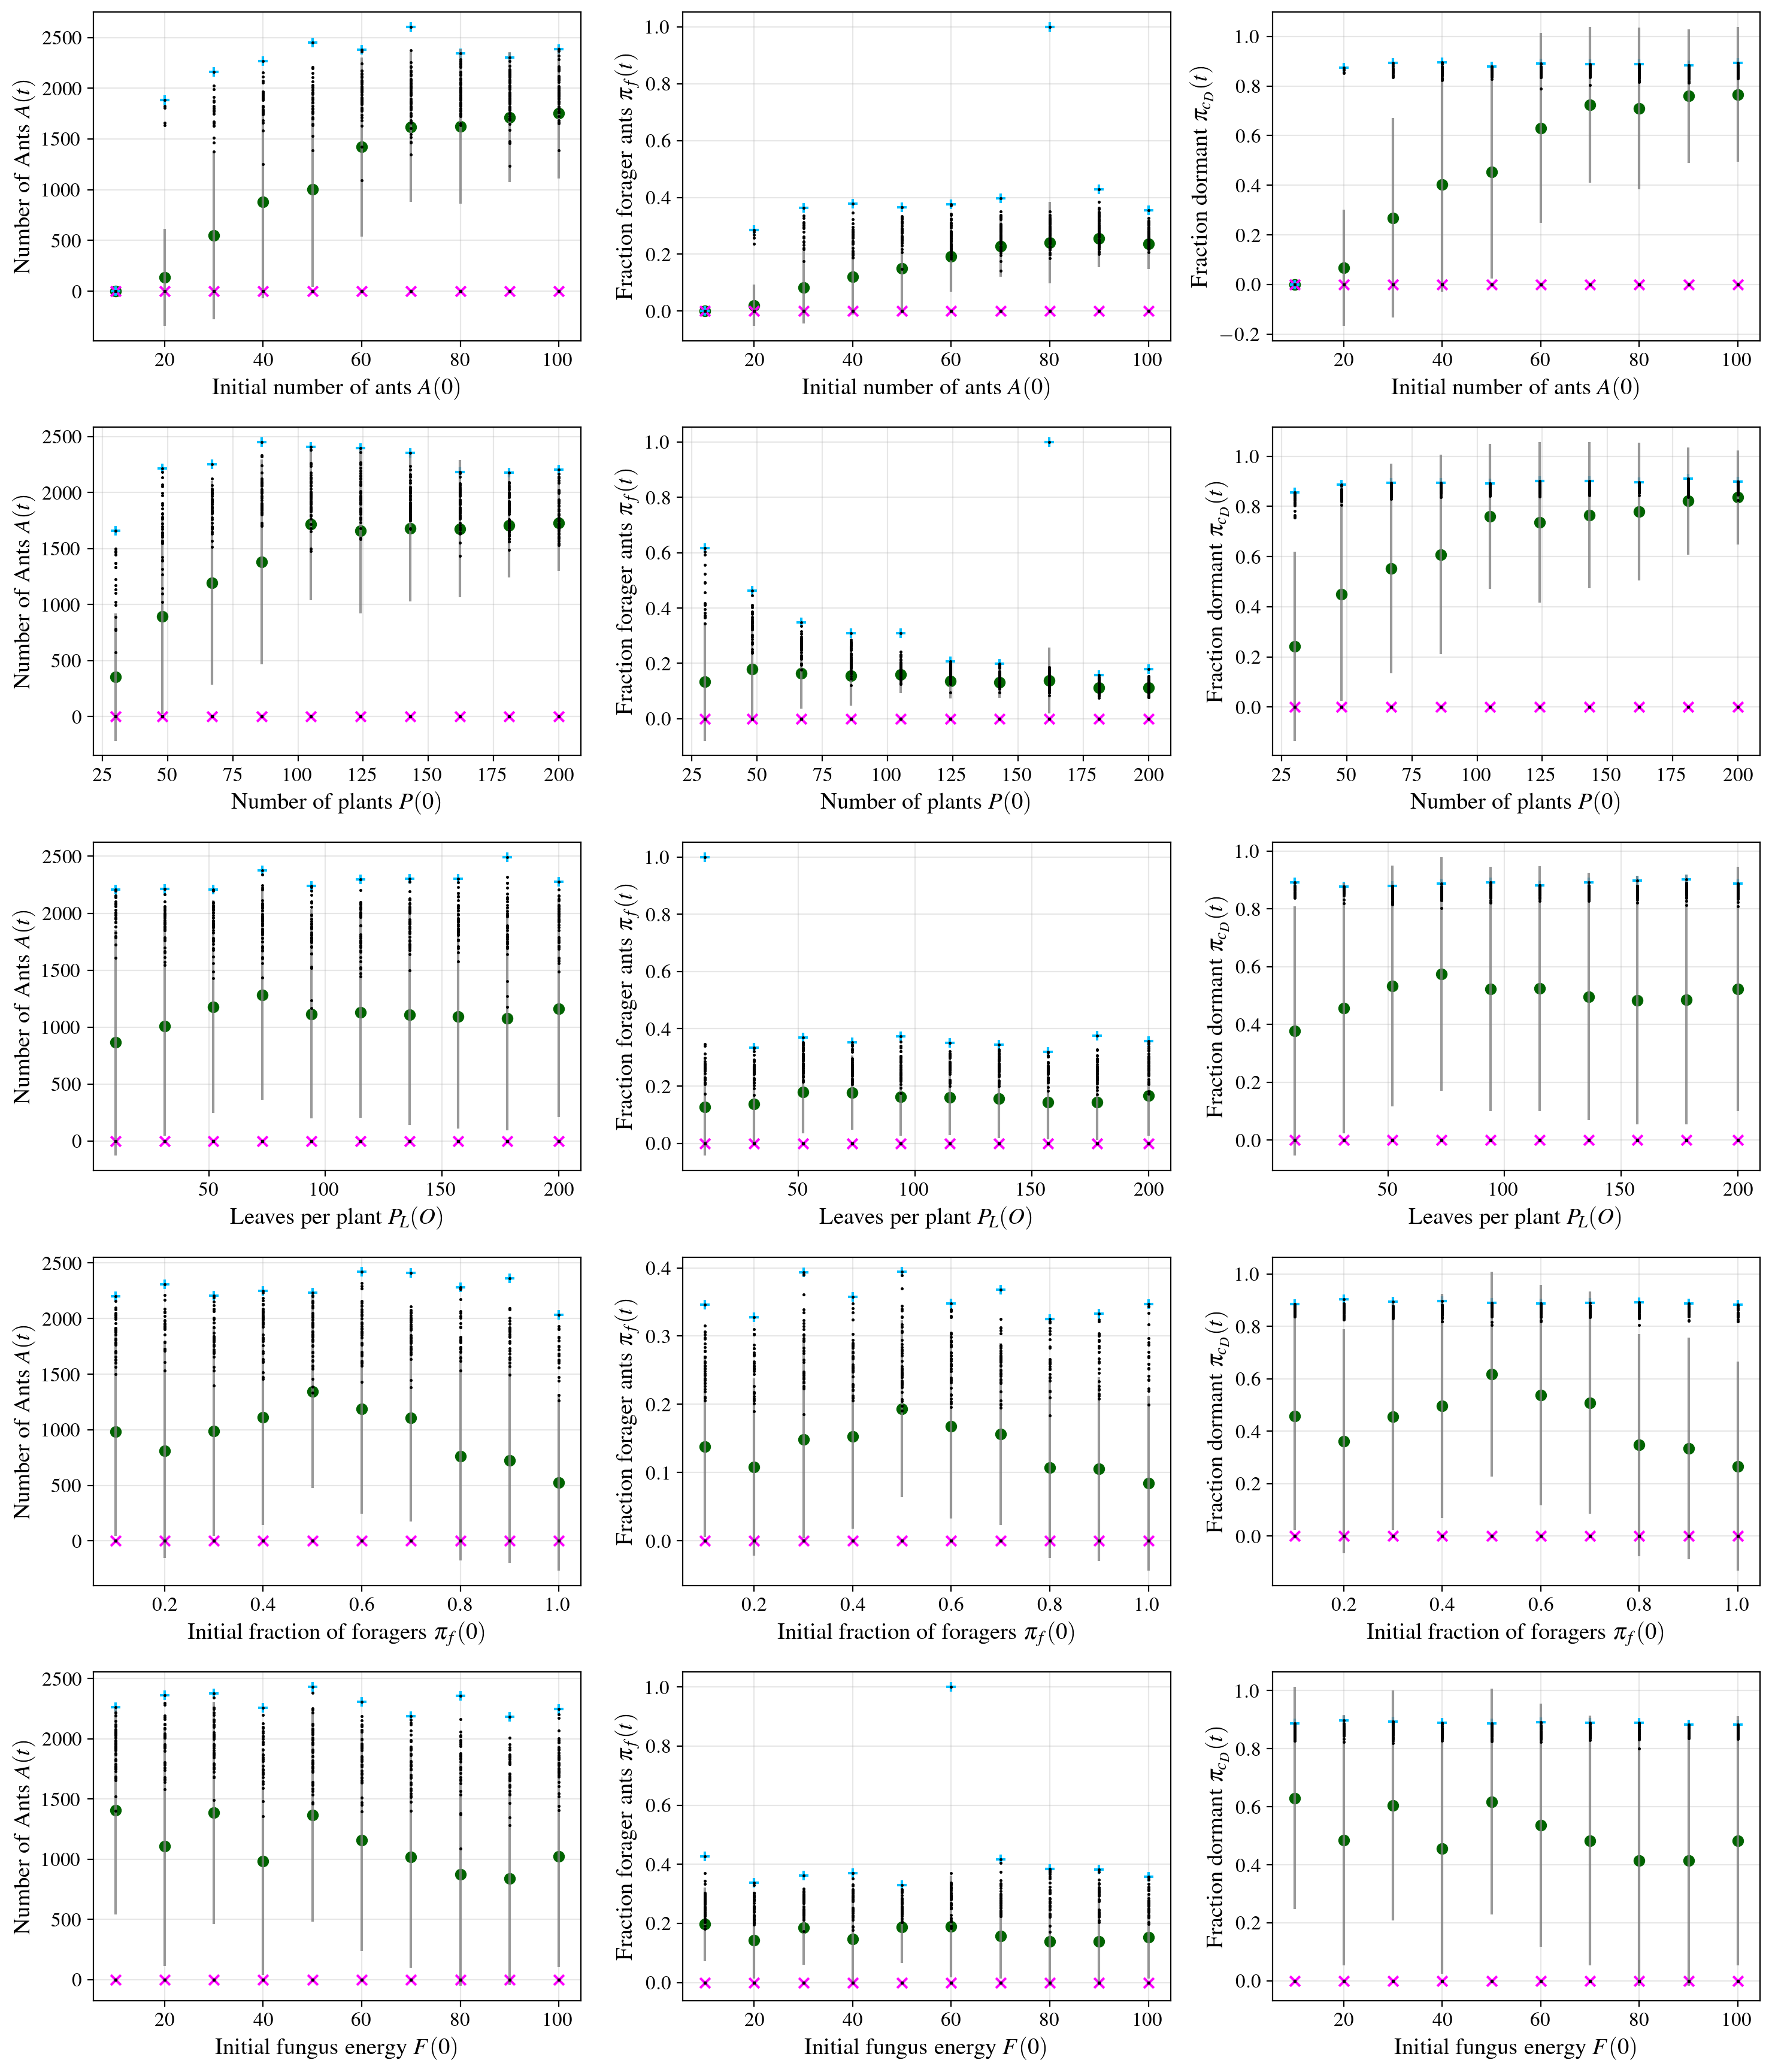

In [30]:
problem = {'num_ants': [int, [10,100]],
           'num_plants': [int, [30,200]], 
           'num_plant_leaves': [int, [10, 200]],
           'initial_foragers_ratio': [float, [0.1, 1.0]], 
           'initial_fungus_energy': [float, [10, 100]],
}

# set the output variables
model_reporters = ["Ants_Biomass",
#                    "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
]

fileName = 'initial_conditions'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name = fileName)

### Variable parameters: Ant "biology" parameters

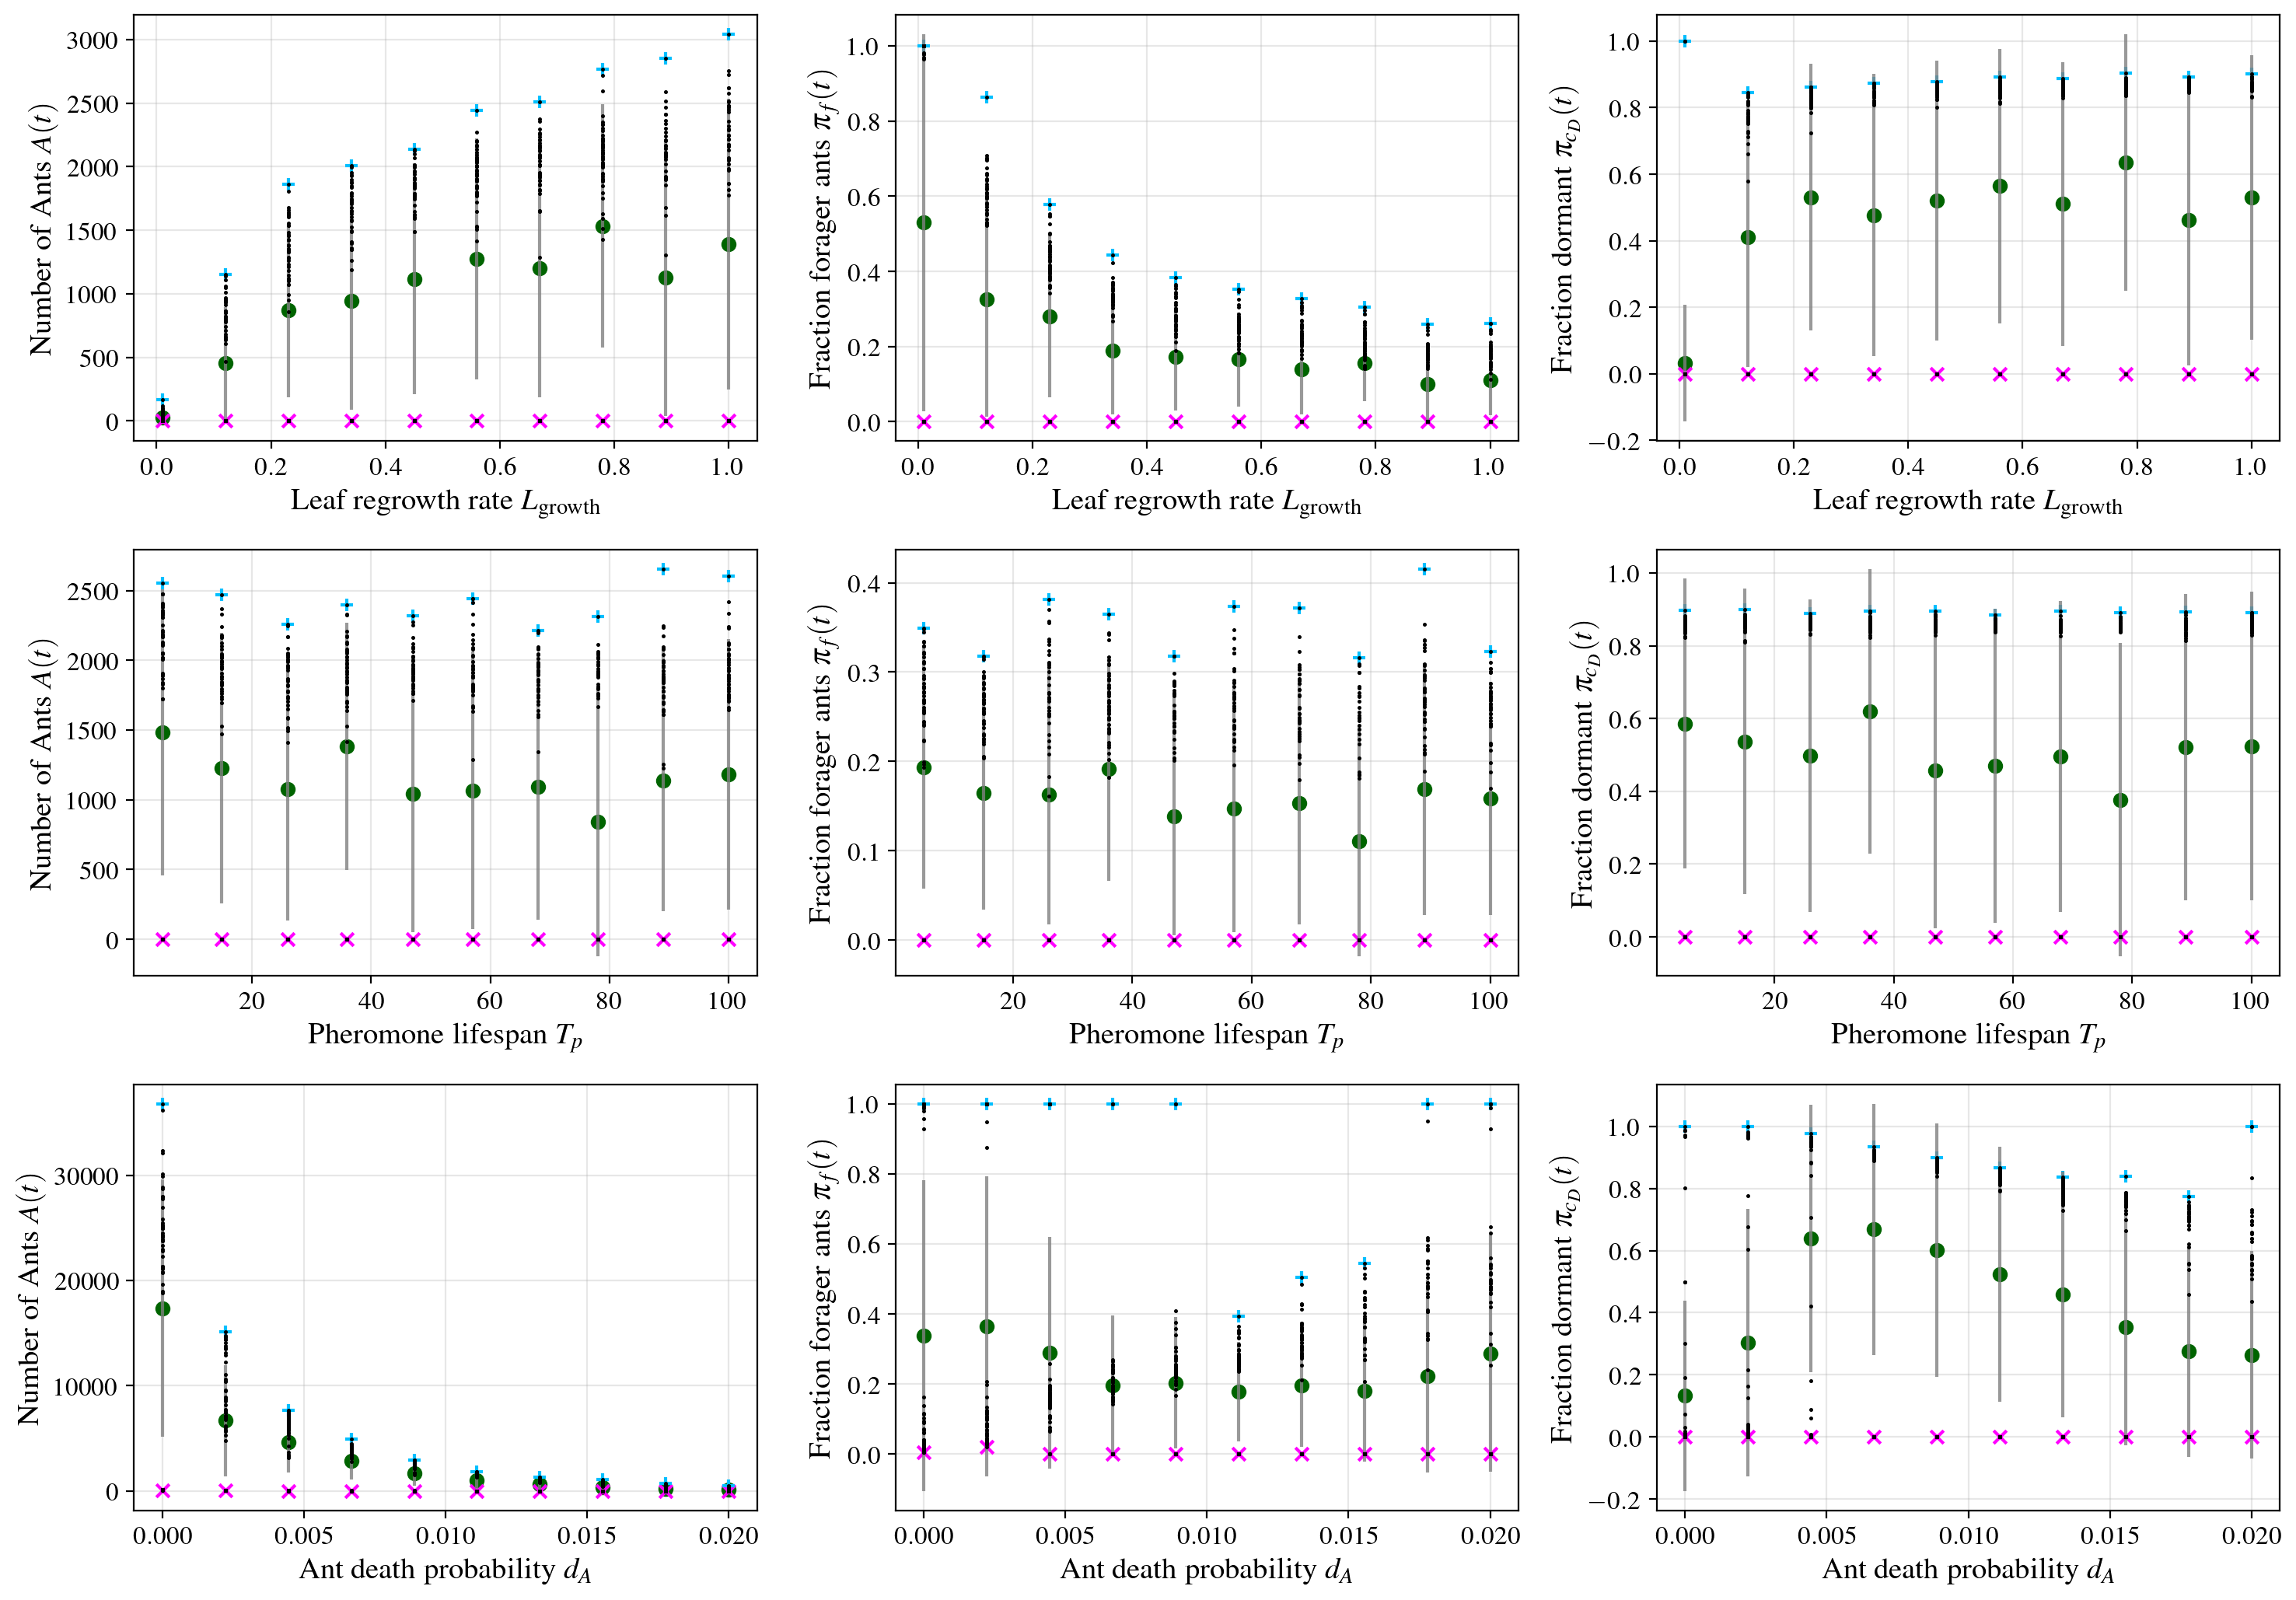

In [31]:
problem = {'leaf_regrowth_rate': [float, [0.01, 1.0]],
           'pheromone_lifespan': [int, [5, 100]],
           'ant_death_probability': [float, [0, 0.02]],
#            'fungus_decay_rate': [float, [0.001, 0.02]], 
#            'energy_biomass_cvn': [float, [1, 4]], 
#            'fungus_larvae_cvn': [float, [0.2, 1.5]],
#            'max_fitness_queue_size': [int, [1, 20]],
#            'caretaker_carrying_amount': [float, [0.1, 2]],
#            'dormant_roundtrip_mean': [float, [30, 80]],
#            'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = ["Ants_Biomass",
#                    "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
]

fileName = 'Ant_biology'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name=fileName)

### Variable parameters: Fungus parameters

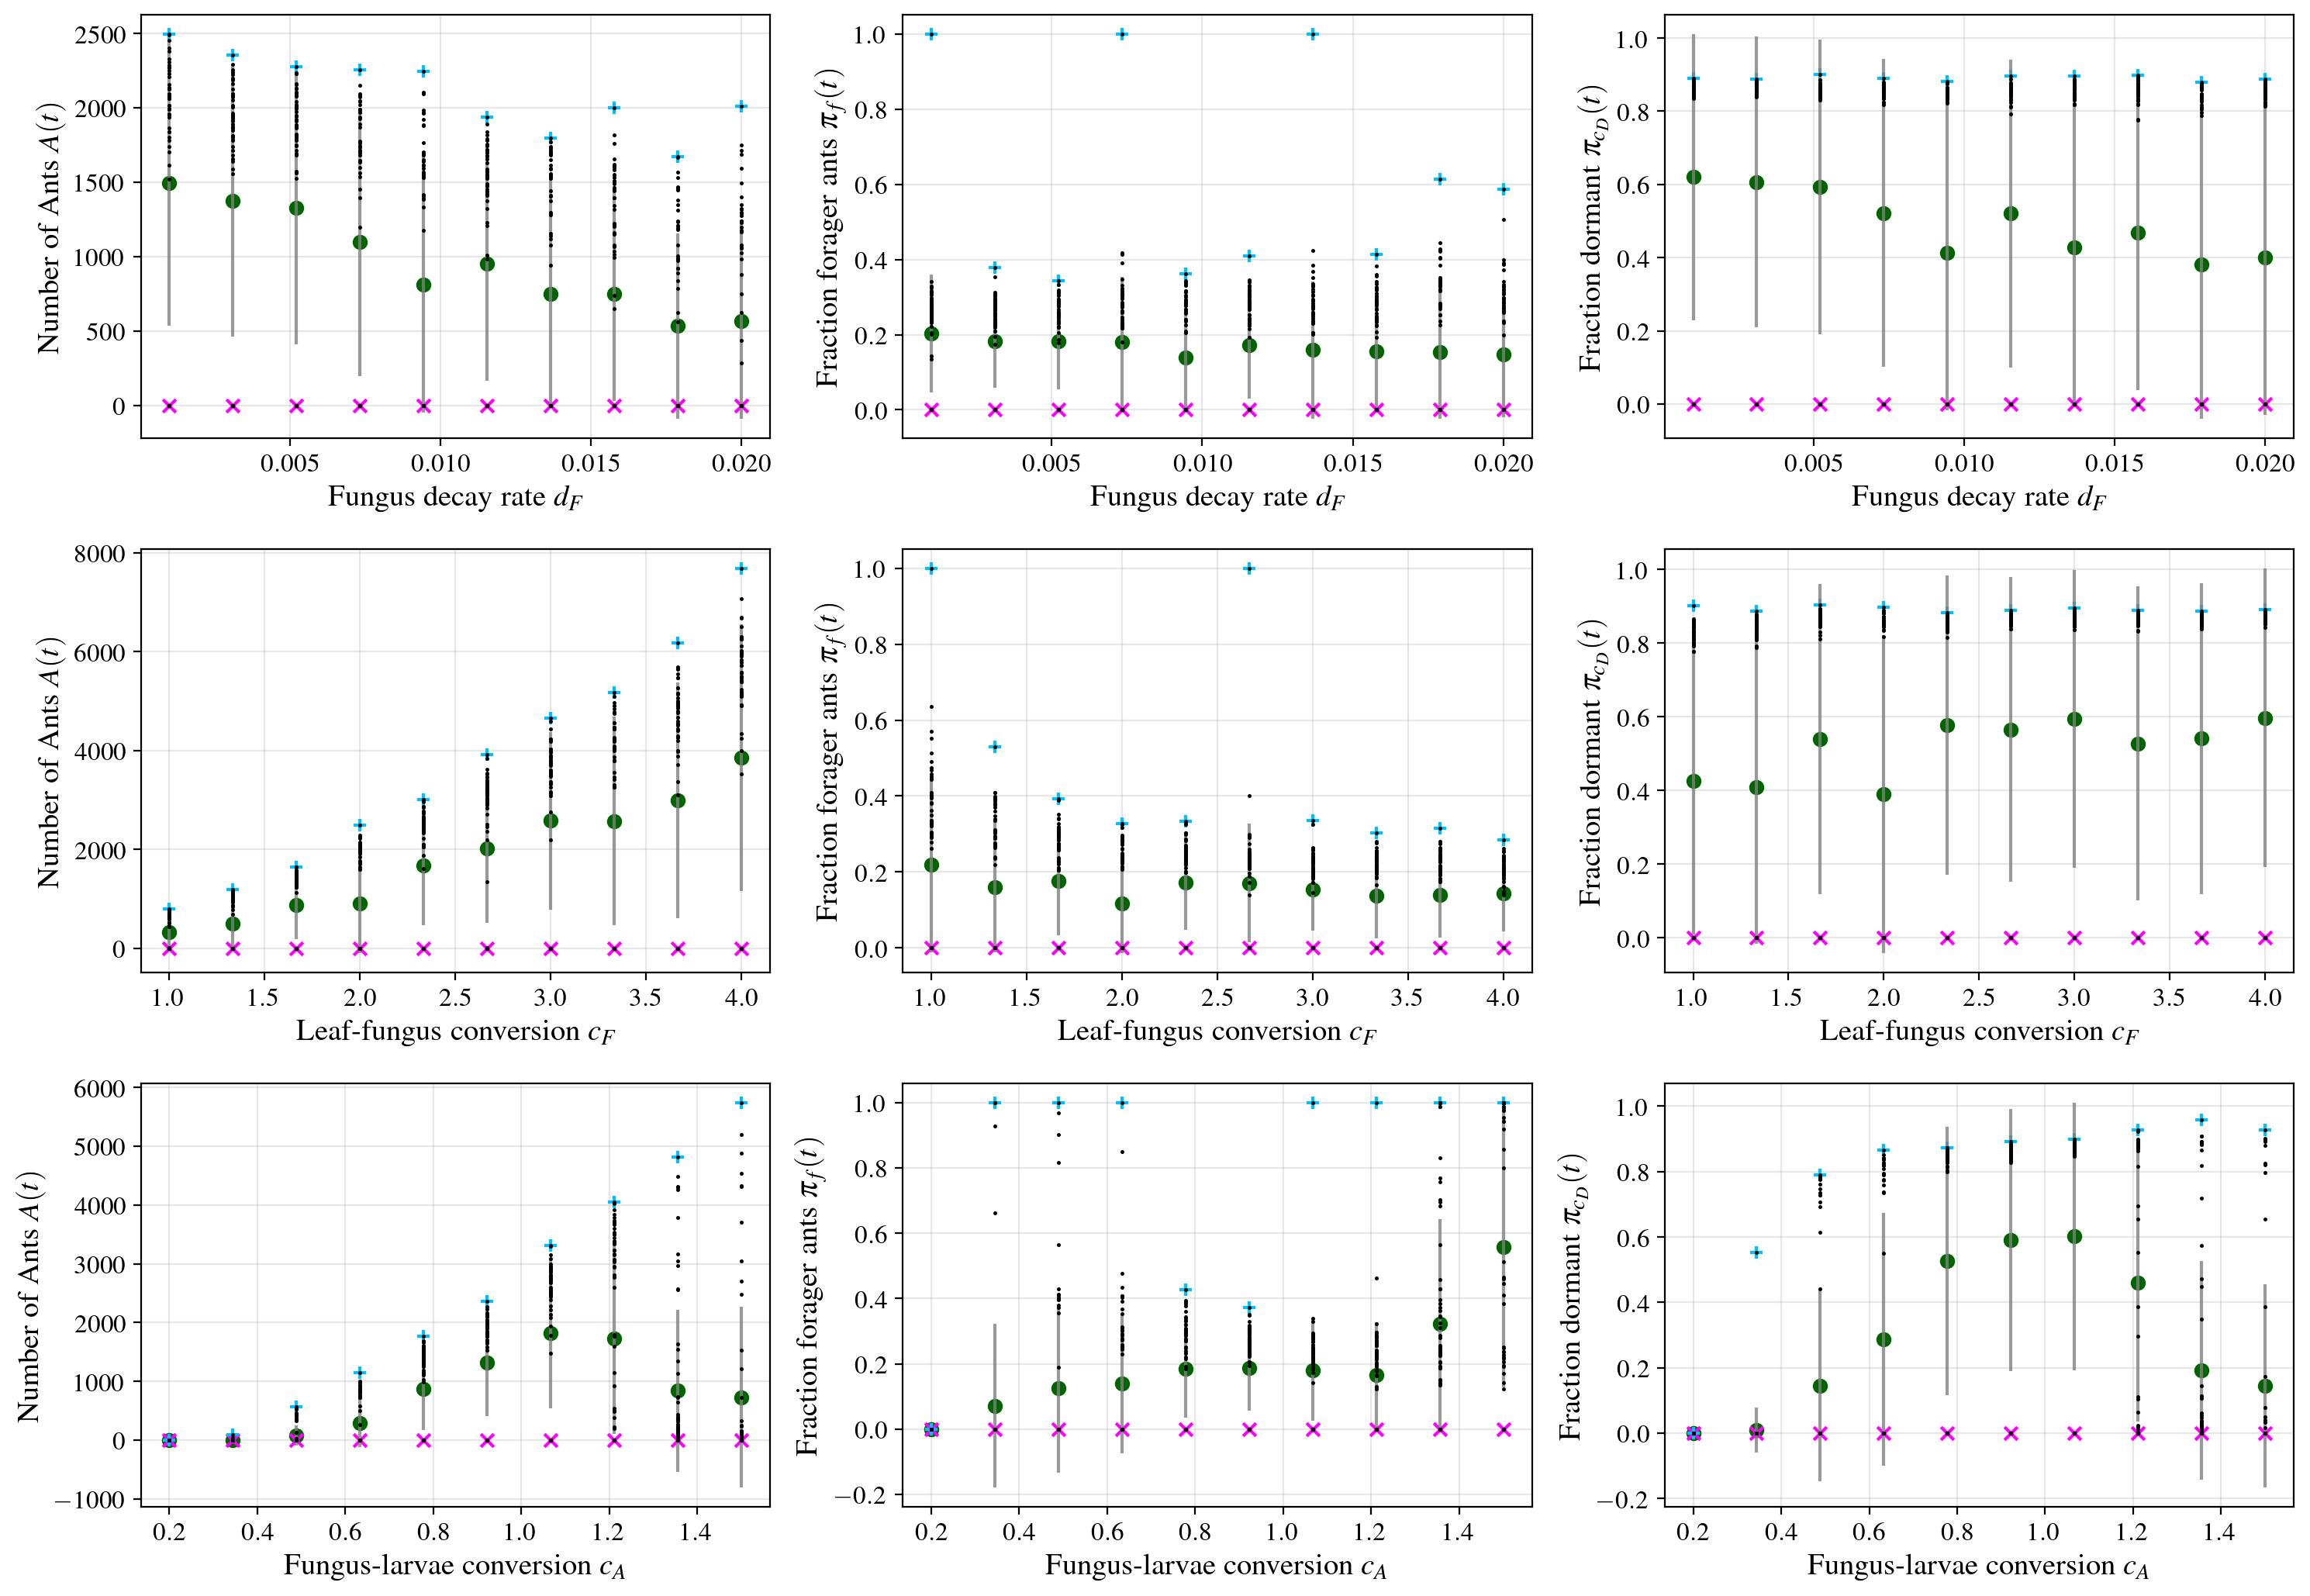

In [32]:
problem = {
           'fungus_decay_rate': [float, [0.001, 0.02]], 
           'energy_biomass_cvn': [float, [1, 4]], 
           'fungus_larvae_cvn': [float, [0.2, 1.5]],
#            'max_fitness_queue_size': [int, [1, 20]],
#            'caretaker_carrying_amount': [float, [0.1, 2]],
#            'dormant_roundtrip_mean': [float, [30, 80]],
#            'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = ["Ants_Biomass",
#                    "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
]

fileName = 'fungus_biology'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name = fileName)

### Variable parameter: Ant caretaker parameters

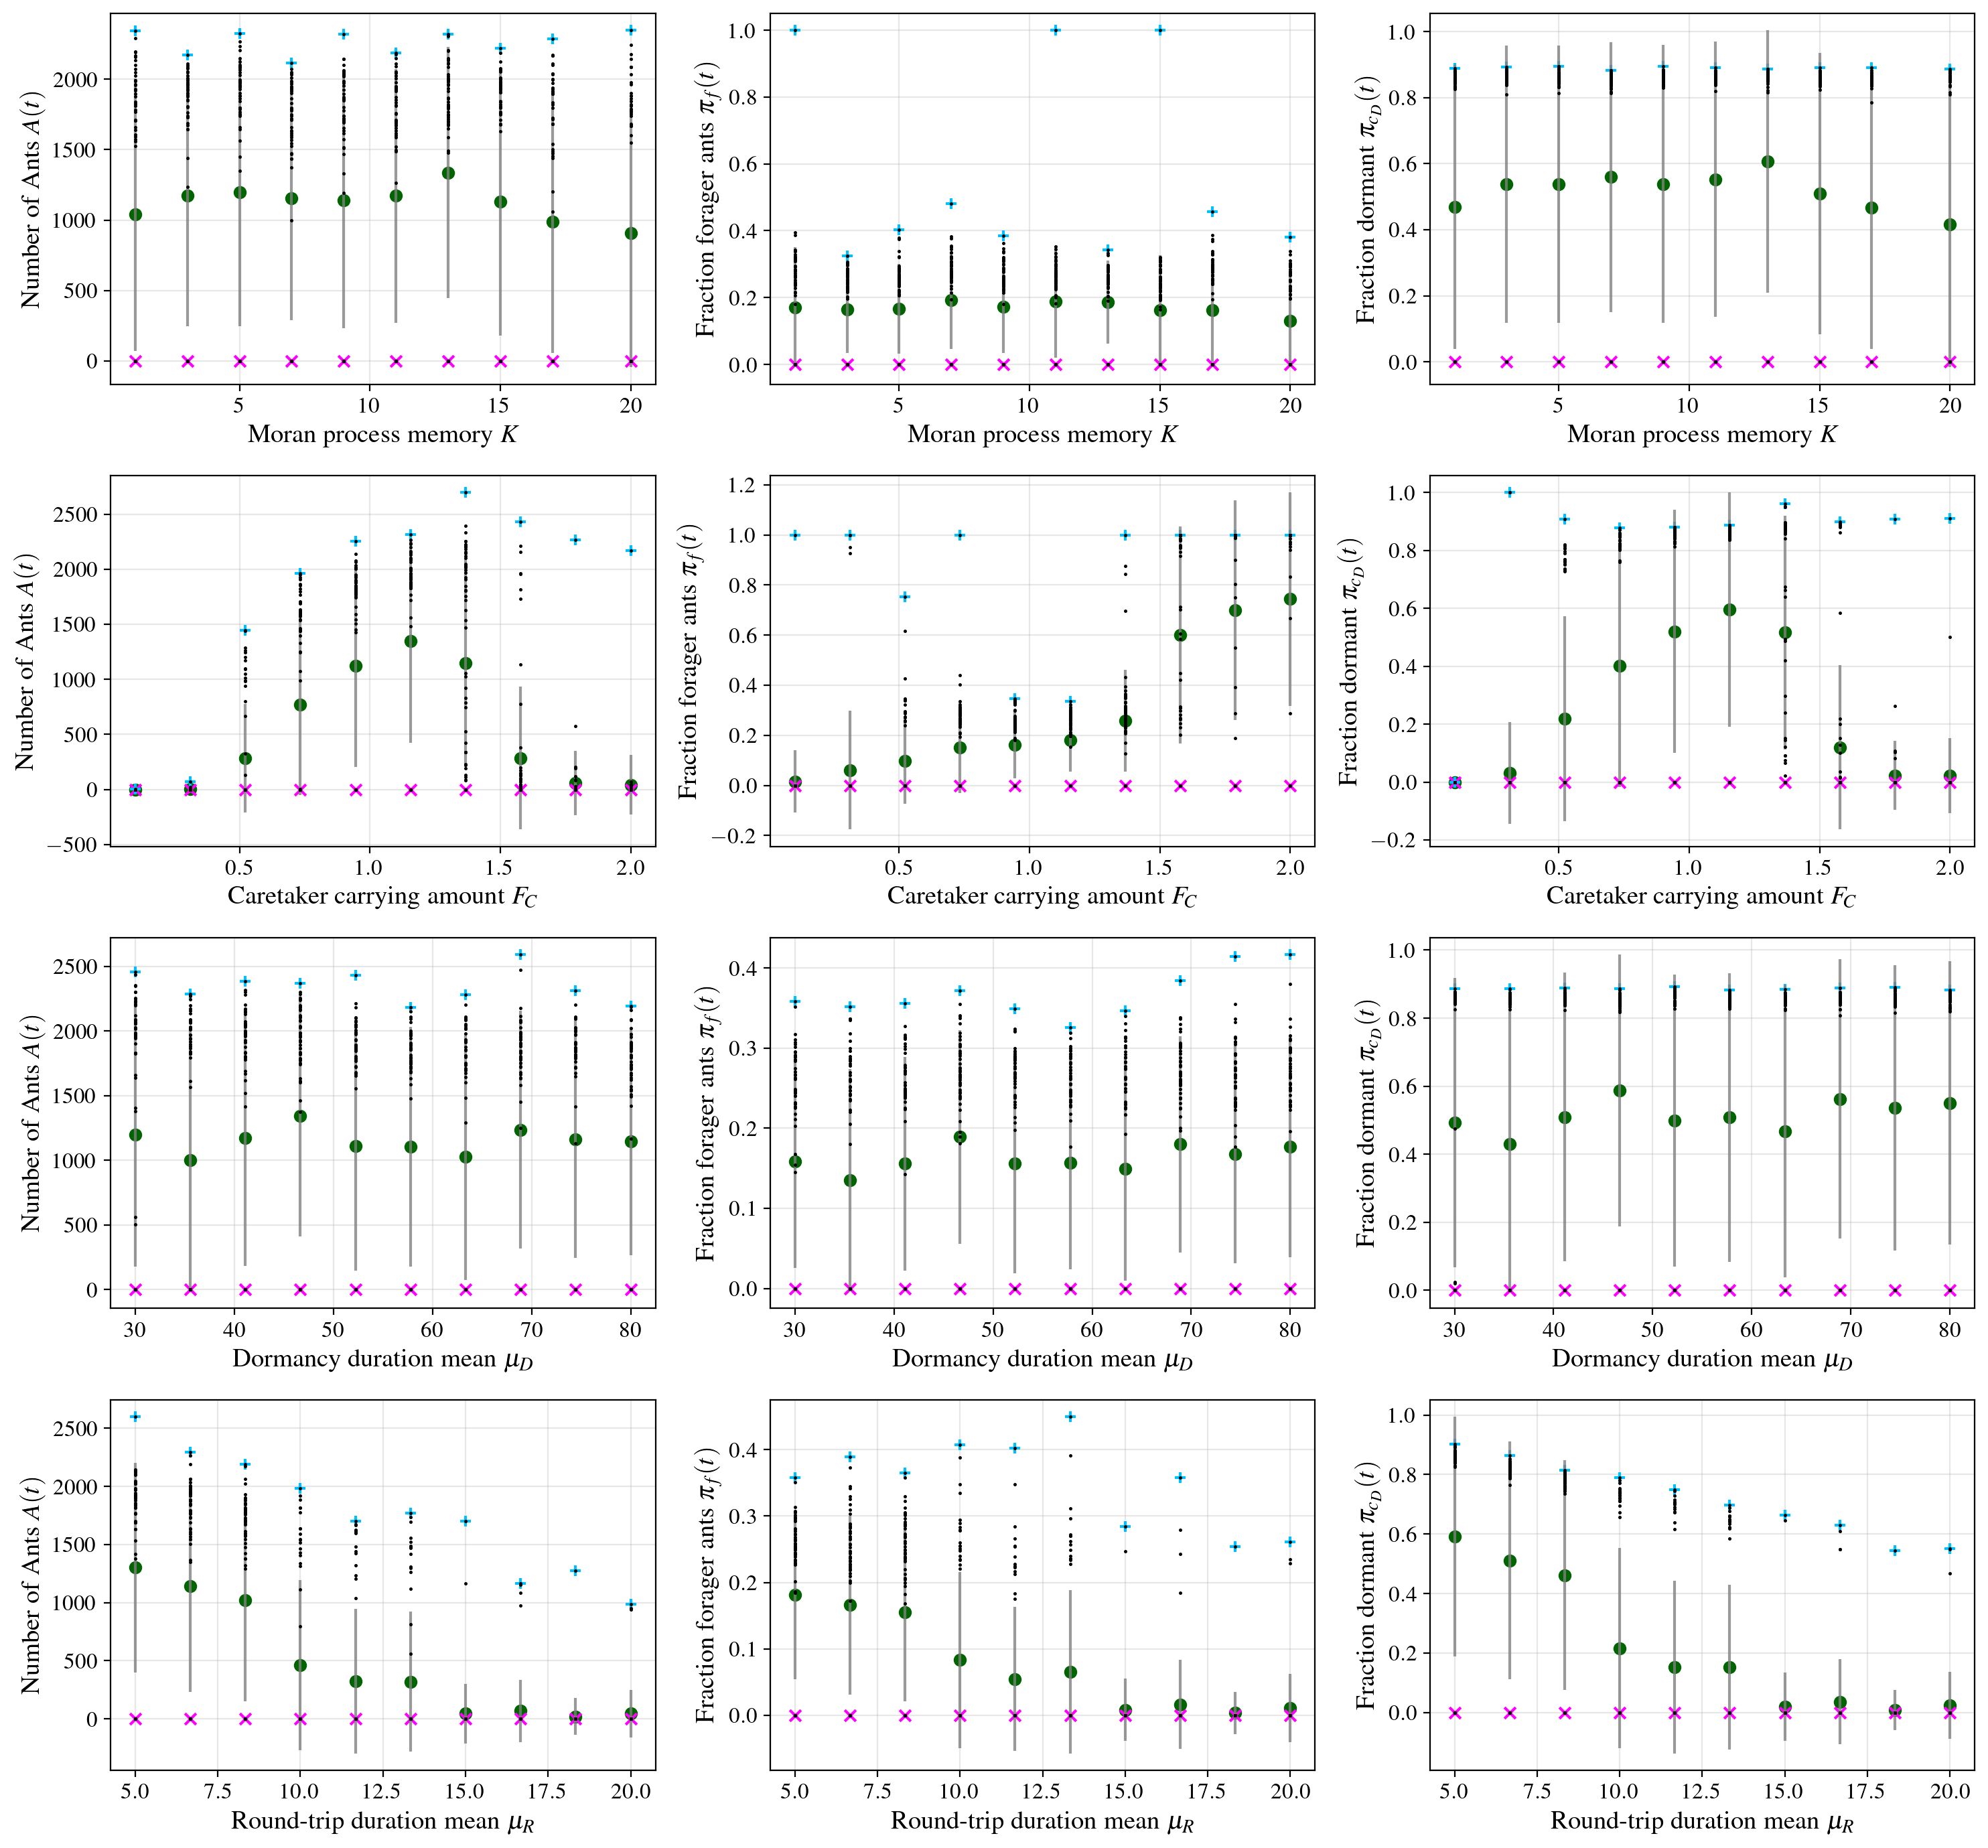

In [33]:
problem = {
           'max_fitness_queue_size': [int, [1, 20]],
           'caretaker_carrying_amount': [float, [0.1, 2]],
           'dormant_roundtrip_mean': [float, [30, 80]],
           'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = ["Ants_Biomass",
#                    "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
]


fileName = 'caretaker_stuff'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name=fileName)

### In report OFAT

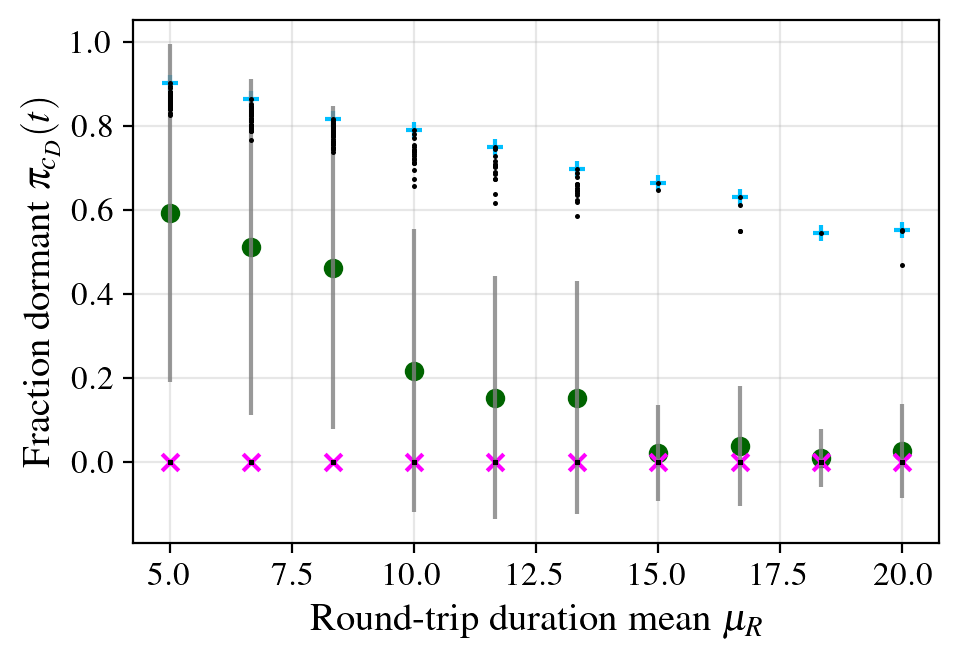

In [34]:
problem = {
           'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = [#"Ants_Biomass",
#                    "Fungus_Biomass",
#                    "Fraction forager ants",
                   "Dormant caretakers fraction",
]


fileName = 'caretaker_roundtrip_mean_onlydormancy'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name=fileName, col_row=False)

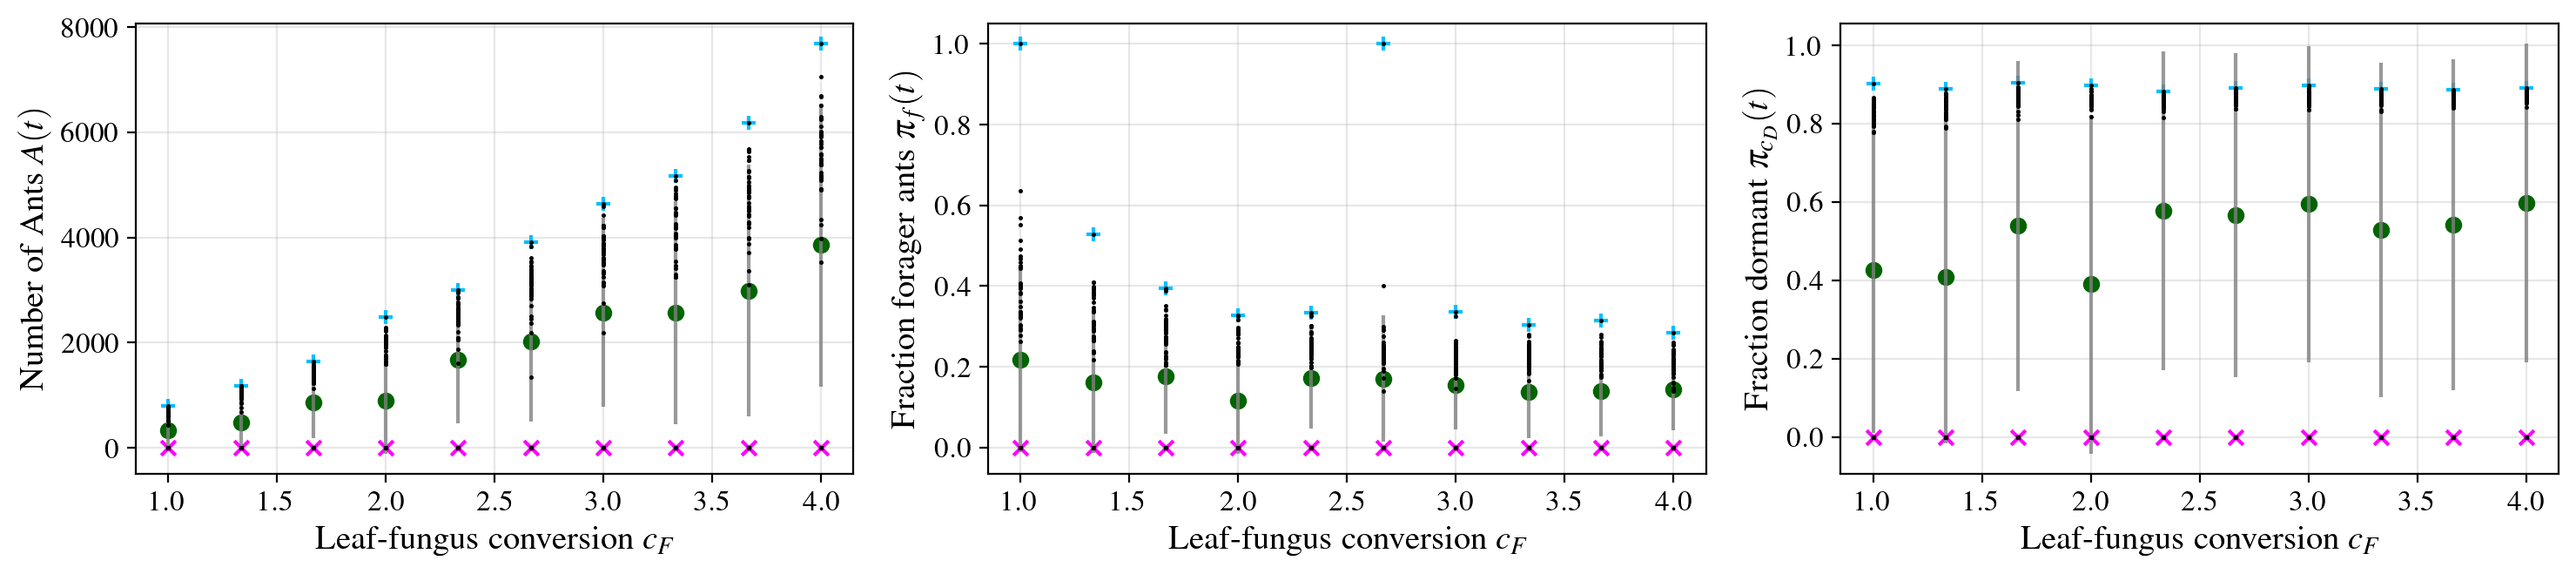

In [35]:
problem = {
           'energy_biomass_cvn': [float, [1, 4]], 
#            'fungus_larvae_cvn': [float, [0.2, 1.5]],
#            'max_fitness_queue_size': [int, [1, 20]],
#            'caretaker_carrying_amount': [float, [0.1, 2]],
#            'dormant_roundtrip_mean': [float, [30, 80]],
#            'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = ["Ants_Biomass",
#                    "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
]

fileName = 'ebcvn'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name = fileName)

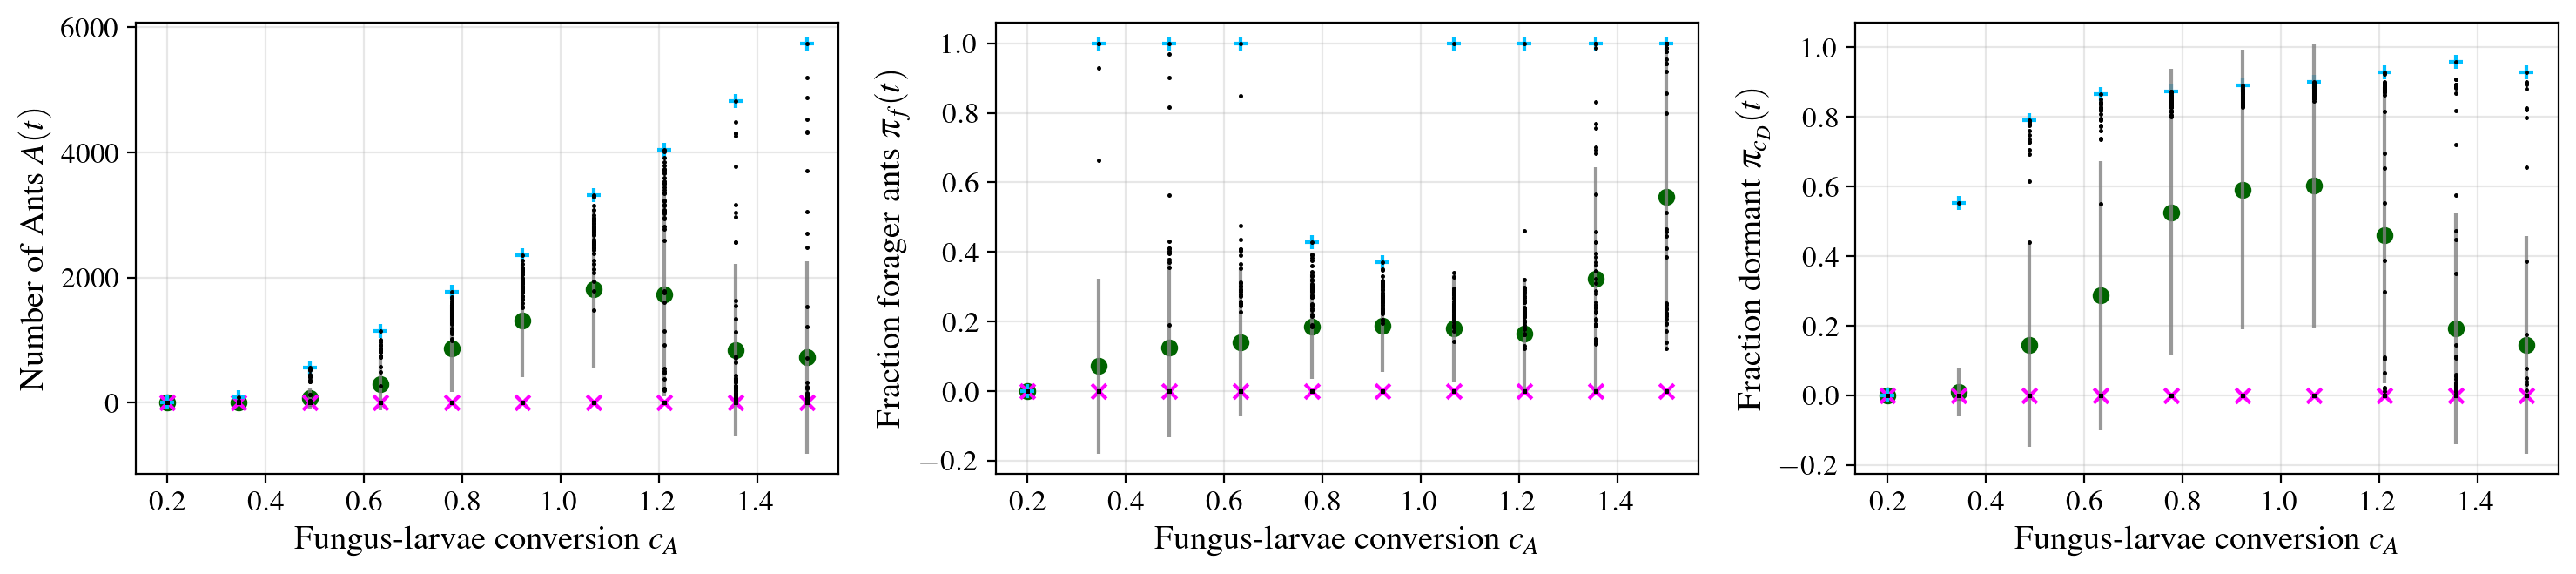

In [36]:
problem = {
#            'energy_biomass_cvn': [float, [1, 4]], 
           'fungus_larvae_cvn': [float, [0.2, 1.5]],
#            'max_fitness_queue_size': [int, [1, 20]],
#            'caretaker_carrying_amount': [float, [0.1, 2]],
#            'dormant_roundtrip_mean': [float, [30, 80]],
#            'caretaker_roundtrip_mean': [float, [5, 20]]
}


# set the output variables
model_reporters = ["Ants_Biomass",
#                    "Fungus_Biomass",
                   "Fraction forager ants",
                   "Dormant caretakers fraction",
]

fileName = 'flcvn'

plot_all_vars(data, model_reporters, problem, save_fig=True, show_fig=True, save_name = fileName)